# INFO 212: Data Science Programming 1
___

## Week 5: Lecture:
### 1. Pandas Cut
### 2. Hierarchical Indexing
---

## Agenda

### Cut and Hierarchical Indexing:
- pd.cut() for categorization
- data.stack()
- data.unstack()
- frame.swaplevel('key1', 'key2')
- frame.sum(level='key2')
- frame.sum(level='color', axis=1)
- frame.set_index(['c', 'd'])
- frame.reset_index()
- frame.reindex(['a', 'b'])

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas cut() function

The cut() function in pandas is used to transform continuous data into categorical ones, often referred to as "binning."

The key parameters of the cut() function are:
- x: Array-like input data.
- bins: Defines the bin edges for the segmentation. Can be an int (defining the number of equal-width bins in the range of x) or a sequence of scalars.
- right: Bool, default True. Indicates whether the bins include the rightmost edge or not.
- labels: Specifies the labels for the returned bins. If set to False, only integer indicators of the bins are returned.
- retbins: Bool, default False. Whether to return the bins or not.

```
data = {'Name': ['Anna', 'Ben', 'Charlie', 'David', 'Ella', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack'],
        'Age': [15, 22, 34, 45, 29, 67, 54, 89, 20, 32]}

df = pd.DataFrame(data)

bins = [0, 18, 35, 50, 70, 100]
labels = ['<18', '18-34', '35-49', '50-69', '70+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels
```

<BarContainer object of 10 artists>

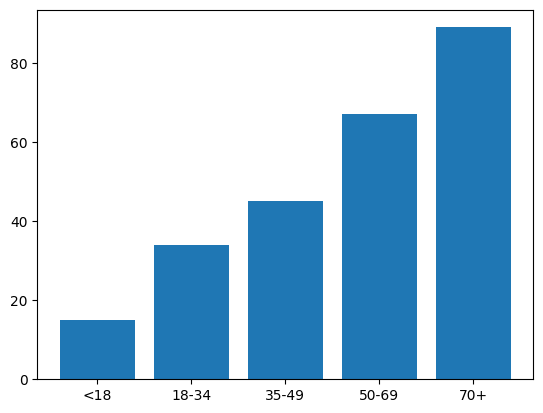

In [15]:
data = {'Name': ['Anna', 'Ben', 'Charlie', 'David', 'Ella', 'Frank', 'Grace', 'Hannah', 'Ivy', 'Jack'],
        'Age': [15, 22, 34, 45, 29, 67, 54, 89, 20, 32]}

df = pd.DataFrame(data)

bins = [0, 18, 35, 50, 70, 100]
labels = ['<18', '18-34', '35-49', '50-69', '70+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.bar(df['Age Group'], df['Age'])

We can assign custom labels to the bins:

```
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Young', 'Young', 'Middle Aged', 'Senior', 'Elderly']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
```


<BarContainer object of 10 artists>

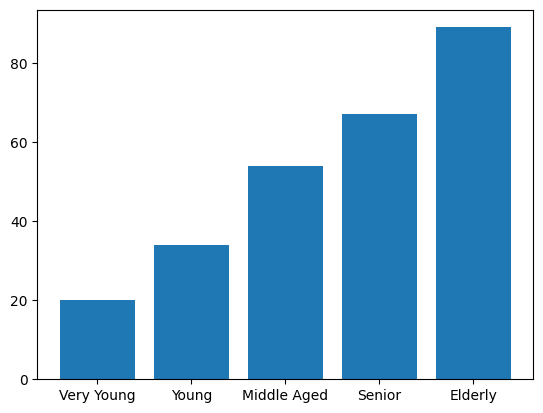

In [17]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Young', 'Young', 'Middle Aged', 'Senior', 'Elderly']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.bar(df['Age Group'], df['Age'])

We can exclude the rightmost edge of the bin:

```
bins = [0, 20, 40, 60, 80, 100]
df['Age Group'] = pd.cut(df['Age'], bins=bins, right=False)
```


TypeError: float() argument must be a string or a real number, not 'pandas._libs.interval.Interval'

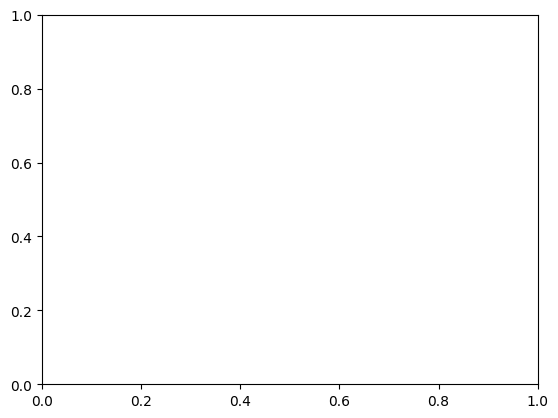

In [18]:
bins = [0, 20, 40, 60, 80, 100]
df['Age Group'] = pd.cut(df['Age'], bins=bins, right=False)

plt.bar(df['Age Group'], df['Age'])

If we specify an integer for bins, it'll create that many equal-width bins:

```
df['Age Group'] = pd.cut(df['Age'], bins=5)
```


## Exercise:
Load the housing.csv as a DataFrame. Plot the median house price. Categorize the median prices into cheap, regular, and expensive. Plot the distribution of the categories.

In [19]:
data = pd.read_csv('/content/drive/MyDrive/info212/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Indexing with a DataFrame's columns
It’s not unusual to want to use one or more columns from a DataFrame as the row
index; alternatively, you may wish to move the row index into the DataFrame’s columns.
Here’s an example DataFrame:


```
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame
````

In [5]:
frame = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                      'c': ['one', 'one', 'one', 'two', 'two',
                            'two', 'two'],
                      'd': [0, 1, 2, 0, 1, 2, 3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


## set_index() and reset_index()
DataFrame’s set_index function will create a new DataFrame using one or more of
its columns as the index:

```
frame.set_index('c')
```

In [6]:
frame.set_index('c')

,a,b,d
c,,,
one,0,7,0
one,1,6,1
one,2,5,2
two,3,4,0
two,4,3,1
two,5,2,2
two,6,1,3


we can also set multiple columns as index. The result has an **hierarchical index!**
```
frame2 = frame.set_index(['c', 'd'])
frame2
```

In [7]:
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

By default the columns are removed from the DataFrame, though you can leave them
in:

```
frame.set_index(['c', 'd'], drop=False)
```

In [8]:
frame.set_index(['c', 'd'], drop=False)


a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

reset_index, on the other hand, does the opposite of set_index; the hierarchical
index levels are moved into the columns:

```
frame2.reset_index()
```

## Exercise:
For the housing DataFrame, create the column `value_cat` using the categories cheap, regular, and expensive based on the value range in previous exercise. Set the columns `ocean_proximity` and `value_cat` as the index for the DataFrame. To group the houses in `ocean_proximity`, ensure the DataFrame is first sorted on `ocean_proximity`. Store the result in df1.

In [21]:
data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [30]:
df['income_cat'] = pd.cut(data.median_income, bins=[0, 2, 8, 30], labels=['low', 'medium', 'high'])
#setting a new column that cuts the data of median_income to make bins that categorizes the data in 3 bins.
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
data.set_index(['ocean_proximity', 'income_cat'])

KeyError: "None of ['income_cat'] are in the columns"

# Hierarchical Indexing

Hierarchical indexing is an important feature of pandas that enables you to have multiple
(two or more) index levels on an axis. Somewhat abstractly, it provides a way for
you to work with higher dimensional data in a lower dimensional form.

```
frame2
```

What you’re seeing is a prettified view of a DataFrame with a MultiIndex as its index. The
“gaps” in the index display mean “use the label directly above”:

```
frame2.index
```

Hierarchical index has levels. The level numbers start from 0 at outmost and increment inward.

With a hierarchically indexed object, so-called partial indexing is possible, enabling
you to concisely select subsets of the data:

```
frame2.loc['one']
frame2.loc['one'].iloc[1]
```

## Exercise:
Show df1'index and its levels. Select all hourses 'INLAND' and plot the distribution of value_cat for those hourses. Similarly, Select all hourses 'ISLAND' and plot the distribution of value_cat for those hourses.

Hierarchical indexing plays an important role in reshaping data group-based
operations like forming a pivot table (next in aggregation). It also provides a convenient way to work with higher dimensional data in a lower dimensional form. For example, we can convert the DataFrame to a 1-D Series.
```
frame3 = frame2.stack()
```

The inverse operation of unstack is stack:

```
frame2.stack().unstack()
```

The DataFrame xs() function takes a key argument to select data at a particular level of a MultiIndex.
```
frame2.xs(1, level=1)
```

## Exercise:
Select all 'expensive' hourses and plot distribution by `ocean_proximity`.

### Reordering and Sorting Levels
At times you will need to rearrange the order of the levels on an axis or sort the data
by the values in one specific level. The swaplevel takes two level numbers or names
and returns a new object with the levels interchanged (but the data is otherwise
unaltered):

```
frame2.swaplevel('c', 'd')
```

sort_index, on the other hand, sorts the data using only the values in a single level.
When swapping levels, it’s not uncommon to also use sort_index so that the result is
lexicographically sorted by the indicated level:

```
frame2.sort_index(level=1)
frame2.swaplevel(0, 1).sort_index(level=0)
```

## Exercise:
Swap the index of df1 so that `value_cat` is at the level 0. Ensure the houses are grouped by the value_cat. Select all expensive houses located in INLAND.